In [118]:
import pandas as pd  
import numpy as np

df = pd.read_csv(r'dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv')

In [119]:
# preprocessing data
# drop the grade column
df = df.drop(columns="Average marks scored before pandemic in traditional classroom")
# split data to inputs and target
inputs = df.drop(columns=["Performance in online","Your level of satisfaction in Online Education"])
inputs = pd.DataFrame(inputs)
inputs.head(5)
target = df["Your level of satisfaction in Online Education"]
target = pd.DataFrame(target)


In [120]:
#preprocssing inputs
#declare catergory columns
category = ["Gender", "Home Location", "Level of Education","Device type used to attend classes","Economic status","Are you involved in any sports?","Do elderly people monitor you?","Interested in Gaming?","Have separate room for studying?","Engaged in group studies?","Interested in?"]

# print("before encoded")
# for i in category:
#     unique = np.unique(inputs[i])
#     print(i)
#     print(unique)

for i in category:
    inputs[i]=inputs[i].astype("category")
    inputs[i]=inputs[i].replace(np.nan, 0)
    # number encoded the category item
    unique = np.unique(inputs[i])
    for j,z in zip(unique,range(len(unique))):
        inputs[i] = inputs[i].replace(j,z)

# print("after encoded")
# for i in category:
#     unique = np.unique(inputs[i])
#     print(i)
#     print(unique)

In [121]:
#convert inputs into one-hot-encoded
from sklearn.preprocessing import OneHotEncoder
import os
base =os.curdir

def one_hot_encode(column, df):
    encoder = OneHotEncoder(sparse = False)
    seleted_col = df[[column]]
    encoder.fit(seleted_col)
    encoded = encoder.transform(seleted_col)
    encoded = pd.DataFrame(data=encoded,columns=encoder.categories_)
    return encoded

def one_hot_encoding(inputs):
    for x in inputs:
        encoded_col = one_hot_encode(x,inputs)
        inputs.drop(x,axis=1,inplace =True)
        for y in encoded_col.columns:
            path = str(x)+str(y)
            path = str(path)
            path = path.replace("'","")
            path = path.replace(",","")
            inputs.insert(len(inputs.columns),path,encoded_col[y])
    return inputs

In [122]:
# inputs = one_hot_encoding(inputs)
# inputs.head(5)
from sklearn.preprocessing import MinMaxScaler
# scale inputs
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(inputs)
print(inputs.shape)
print(scaled.shape)
inputs = pd.DataFrame(scaled)
inputs.head(5)

(1033, 20)
(1033, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,1.0,0.290323,0.526316,0.5,0.0,0.250,1.00,0.0,1.0,0.222222,0.555556,0.000000,0.0,0.0,0.0,0.0,0.00,0.5
1,1.0,1.0,1.0,0.322581,0.315789,0.5,0.0,0.250,0.00,1.0,1.0,0.666667,0.444444,0.000000,1.0,1.0,0.0,0.0,0.00,1.0
2,1.0,0.0,1.0,0.290323,0.210526,0.5,0.0,0.375,0.25,0.0,1.0,0.555556,0.666667,0.000000,0.0,1.0,0.0,0.0,0.00,0.0
3,1.0,1.0,1.0,0.290323,0.210526,0.5,0.0,0.250,0.75,1.0,1.0,0.222222,0.555556,0.111111,0.0,0.0,1.0,0.0,0.25,1.0
4,1.0,0.0,1.0,0.290323,0.210526,0.5,0.0,0.250,0.50,0.0,0.0,0.777778,0.666667,0.111111,1.0,1.0,1.0,0.5,0.50,0.0


In [123]:
#preprocessing target
unique = np.unique(target)
# number encoded target
# for i, j in zip(unique,range(len(unique))):
#     target = target.replace(i,j)

target = one_hot_encoding(target)
    
target.head(5)

,Your level of satisfaction in Online Education(Average),Your level of satisfaction in Online Education(Bad),Your level of satisfaction in Online Education(Good)
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [124]:
inputs= inputs.values
target = target.values
print(inputs.shape)
print(target.shape)

(1033, 20)
(1033, 3)


In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [126]:
from tensorflow.keras import layers
model = Sequential([
    layers.Dense(15, input_dim = 20, activation = 'relu'), # Rectified Linear Unit Activation Function
    layers.Dense(10, activation = 'relu'),
    layers.Dense(5, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation = 'softmax') # Softmax for multi-class classification
])
    # Compile model here
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)   

In [128]:
# seed = 10
# np.random.seed(seed)
# estimator = KerasClassifier(build_fn = model, epochs = 100, batch_size = 10, verbose = 0)

# kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)

# results = cross_val_score(estimator, inputs, target, cv = kfold)
# print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [129]:
epochs=250
history = model.fit(
  X_train,
  y_train,
  validation_data = (X_test,y_test),
  batch_size = 100,
  epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

print(np.max(val_acc))
print(val_loss[np.argmax(val_acc)])
print(np.argmax(val_acc))

Epoch 1/250
9/9 [==============================] - 1s 17ms/step - loss: 1.0749 - accuracy: 0.4831 - val_loss: 1.0737 - val_accuracy: 0.4831
Epoch 2/250
9/9 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.4952 - val_loss: 1.0684 - val_accuracy: 0.4976
Epoch 3/250
9/9 [==============================] - 0s 3ms/step - loss: 1.0461 - accuracy: 0.5109 - val_loss: 1.0657 - val_accuracy: 0.5024
Epoch 4/250
9/9 [==============================] - 0s 3ms/step - loss: 1.0438 - accuracy: 0.5230 - val_loss: 1.0647 - val_accuracy: 0.5024
Epoch 5/250
9/9 [==============================] - 0s 4ms/step - loss: 1.0441 - accuracy: 0.5206 - val_loss: 1.0637 - val_accuracy: 0.5024
Epoch 6/250
9/9 [==============================] - 0s 3ms/step - loss: 1.0300 - accuracy: 0.5254 - val_loss: 1.0639 - val_accuracy: 0.5024
Epoch 7/250
9/9 [==============================] - 0s 3ms/step - loss: 1.0287 - accuracy: 0.5206 - val_loss: 1.0649 - val_accuracy: 0.5024
Epoch 8/250
9/9 [=========

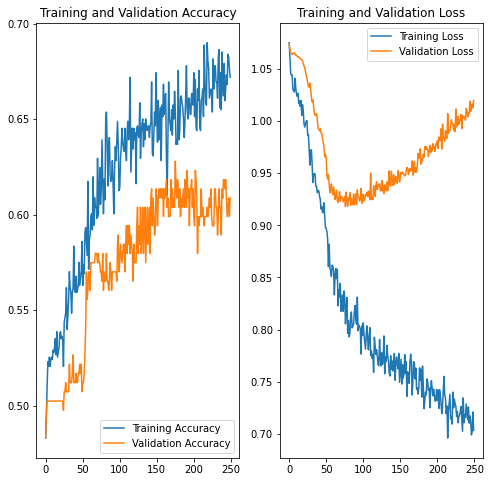

In [130]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()